<a href="https://colab.research.google.com/github/IzzahAlfatih/Tugas-Python/blob/main/Tugas_14_Prx_SNR_Kapasitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
f1=700 #MHz
f2=900 #MHz
f3=1800 #MHz
locU='urban'
locS='suburban'
locO='open'
tower=80 #m
user=1.5 #m
dmin=300 #m
dmax=1000 #m
N=200 #titik
dt=30 #Watt
gt=10 #dB
gr=2 #dB
bw=5 #Mhz

Wtm=dt*1000 #Watt to milliWatt
Ptx=10*np.log10(Wtm) #milliWatt to dBm
bwHz= bw*1000000 #MegaHz to Hz


d=np.random.randint(dmin,dmax,N)
d_sort=d[np.argsort(d)]

In [14]:
#Fungsi PathLoss

def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [21]:
#Fungsi Daya Terima

def prx(Ptx,PL,Gtx,Grx):
  DayaT= Ptx-PL+Gtx+Grx
  DT=10**(DayaT/10)
  return DT

In [26]:
#Fungsi SNR

def snr (prx,bw):
  noiseL= (-174)+10*np.log10(bw) #Noise dalam logaritmik
  noiseN= 10**(noiseL/10)
  snrN = prx/noiseN
  return snrN

In [28]:
#Fungsi Kapasitas Seluler (bps)

def kp (SNR,bw):
  kpst=bw*np.log2(1+SNR)
  return kpst

In [29]:
#Menghitung PathLoss

LpUrban=cos(f3,locU,tower,user,d)
LpSuburban=cos(f3,locS,tower,user,d)
LpOpen=cos(f3,locO,tower,user,d)

Lp700=cos(f1,locU,tower,user,d)
Lp900=cos(f2,locU,tower,user,d)
Lp1800=cos(f3,locU,tower,user,d)

In [30]:
#Menghitung Daya Terima

PrxUrban=prx(Ptx,LpUrban,gt,gr)
PrxSuburban=prx(Ptx,LpSuburban,gt,gr)
PrxOpen=prx(Ptx,LpOpen,gt,gr)

Prx700=prx(Ptx,Lp700,gt,gr)
Prx900=prx(Ptx,Lp900,gt,gr)
Prx1800=prx(Ptx,Lp1800,gt,gr)

#Proses Sorting
PrxUrban_sort=PrxUrban[np.argsort(d)]
PrxSuburban_sort=PrxSuburban[np.argsort(d)]
PrxOpen_sort=PrxOpen[np.argsort(d)]

Prx700_sort=Prx700[np.argsort(d)]
Prx900_sort=Prx900[np.argsort(d)]
Prx1800_sort=Prx1800[np.argsort(d)]

In [32]:
#Menghitung Daya Terima

SnrUrban=snr(PrxUrban,bwHz)
SnrSuburban=snr(PrxSuburban,bwHz)
SnrOpen=snr(PrxOpen,bwHz)

Snr700=snr(Prx700,bwHz)
Snr900=snr(Prx900,bwHz)
Snr1800=snr(Prx1800,bwHz)

#Proses Sorting
SnrUrban_sort=SnrUrban[np.argsort(d)]
SnrSuburban_sort=SnrSuburban[np.argsort(d)]
SnrOpen_sort=SnrOpen[np.argsort(d)]

Snr700_sort=Snr700[np.argsort(d)]
Snr900_sort=Snr900[np.argsort(d)]
Snr1800_sort=Snr1800[np.argsort(d)]

In [33]:
#Menghitung Kapasitas Seluler

KpstUrban=kp(SnrUrban,bwHz)
KpstSuburban=kp(SnrSuburban,bwHz)
KpstOpen=kp(SnrOpen,bwHz)

Kpst700=kp(Snr700,bwHz)
Kpst900=kp(Snr900,bwHz)
Kpst1800=kp(Snr1800,bwHz)

#Proses Sorting
KpstUrban_sort=KpstUrban[np.argsort(d)]
KpstSuburban_sort=KpstSuburban[np.argsort(d)]
KpstOpen_sort=KpstOpen[np.argsort(d)]

Kpst700_sort=Kpst700[np.argsort(d)]
Kpst900_sort=Kpst900[np.argsort(d)]
Kpst1800_sort=Kpst1800[np.argsort(d)]

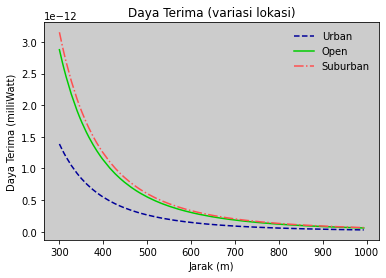

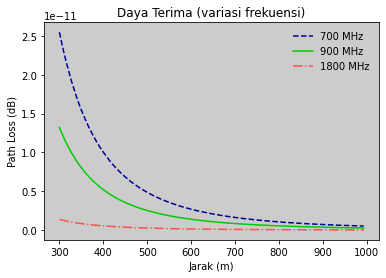

In [38]:
#Grafik Daya Terima

#Variasi Lokasi
plt.figure()
plt.rcParams['axes.facecolor'] = '#cccccc'

plt.plot(d_sort,PrxUrban_sort,'#000099',linestyle='--', label='Urban')
plt.plot(d_sort,PrxOpen_sort,'#00cc00',linestyle='-', label='Open')
plt.plot(d_sort,PrxSuburban_sort,'#ff5050',linestyle='-.', label='Suburban')

plt.legend()
plt.title('Daya Terima (variasi lokasi)')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (milliWatt)')
plt.show()

#Variasi Frekuensi
plt.figure()
plt.rcParams['axes.facecolor'] = '#cccccc'

plt.plot(d_sort,Prx700_sort,'#000099',linestyle='--', label='700 MHz')
plt.plot(d_sort,Prx900_sort,'#00cc00',linestyle='-', label='900 MHz')
plt.plot(d_sort,Prx1800_sort,'#ff5050',linestyle='-.', label='1800 MHz')

plt.legend()
plt.title('Daya Terima (variasi frekuensi)')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

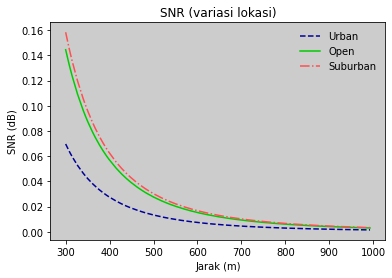

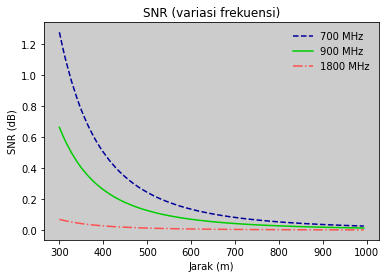

In [40]:
#Grafik SNR

#Variasi Lokasi
plt.figure()
plt.rcParams['axes.facecolor'] = '#cccccc'

plt.plot(d_sort,SnrUrban_sort,'#000099',linestyle='--', label='Urban')
plt.plot(d_sort,SnrOpen_sort,'#00cc00',linestyle='-', label='Open')
plt.plot(d_sort,SnrSuburban_sort,'#ff5050',linestyle='-.', label='Suburban')

plt.legend()
plt.title('SNR (variasi lokasi)')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (dB)')
plt.show()

#Variasi Frekuensi
plt.figure()
plt.rcParams['axes.facecolor'] = '#cccccc'

plt.plot(d_sort,Snr700_sort,'#000099',linestyle='--', label='700 MHz')
plt.plot(d_sort,Snr900_sort,'#00cc00',linestyle='-', label='900 MHz')
plt.plot(d_sort,Snr1800_sort,'#ff5050',linestyle='-.', label='1800 MHz')

plt.legend()
plt.title('SNR (variasi frekuensi)')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (dB)')
plt.show()

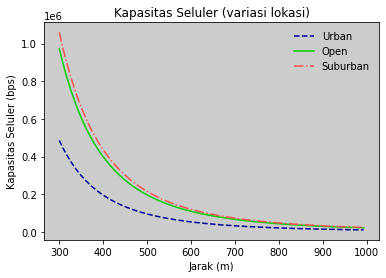

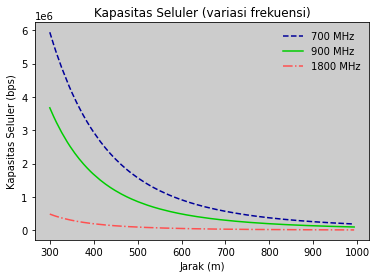

In [41]:
#Grafik Kapasitas Seluler

#Variasi Lokasi
plt.figure()
plt.rcParams['axes.facecolor'] = '#cccccc'

plt.plot(d_sort,KpstUrban_sort,'#000099',linestyle='--', label='Urban')
plt.plot(d_sort,KpstOpen_sort,'#00cc00',linestyle='-', label='Open')
plt.plot(d_sort,KpstSuburban_sort,'#ff5050',linestyle='-.', label='Suburban')

plt.legend()
plt.title('Kapasitas Seluler (variasi lokasi)')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas Seluler (bps)')
plt.show()

#Variasi Frekuensi
plt.figure()
plt.rcParams['axes.facecolor'] = '#cccccc'

plt.plot(d_sort,Kpst700_sort,'#000099',linestyle='--', label='700 MHz')
plt.plot(d_sort,Kpst900_sort,'#00cc00',linestyle='-', label='900 MHz')
plt.plot(d_sort,Kpst1800_sort,'#ff5050',linestyle='-.', label='1800 MHz')

plt.legend()
plt.title('Kapasitas Seluler (variasi frekuensi)')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas Seluler (bps)')
plt.show()